**Adam Ćwikła, Karolina Źróbek**
#### Labratorium 4
Informatyka Medyczna 2024

# Fingerprint Matching with OpenCV

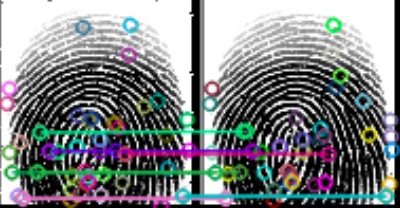


Fingerprint recognition is a critical aspect of modern biometric systems, widely used in security, forensics, and personal identification applications. The unique patterns found in fingerprints make them an excellent means of verifying identity. In this exercise, we will explore the process of fingerprint image matching using OpenCV, a powerful open-source computer vision and machine learning library.





## Objectives
### Fingerprint Patterns
 The distinct features of fingerprints include: ridges, valleys, minutiae points (endings and bifurcations).

 **Ridges**: the raised lines that form the intricate patterns on a fingerprint. These ridges make up the loops, whorls, and arches characteristic of fingerprint patterns. When a person touches a surface, these ridges leave an impression that can be captured and analyzed for identification

 **Valleys**: the spaces or depressions between the ridges. These valleys help define the overall pattern and structure of the fingerprint. The contrast between ridges and valleys creates the unique patterns used for fingerprint recognition.

 **Bifurcations**: These are points where a single ridge splits into two separate ridges. Bifurcations contribute to the uniqueness of a fingerprint.

 **Ridge Endings**: These are points where a ridge abruptly ends. Ridge endings are crucial in forming the distinctive details of a fingerprint.


### Preprocessing Images
  To improve the clarity and usability of fingerprint images for matching, preprocessing steps such as image smoothing will be tested.




### Feature Extraction Techniques: SIFT, SURF, FAST, and BRIEF
Feature extraction is a crucial step for identifying and matching patterns within images. For fingerprint recognition, this process involves detecting and describing key points that make each fingerprint unique. In this exercise, we will explore four popular feature extraction techniques: SIFT, SURF, FAST, and BRIEF. Each method offers distinct advantages and is widely used in various applications of image analysis.

#### SIFT (Scale-Invariant Feature Transform)

SIFT is a robust algorithm for detecting and describing local features in images. Developed by David Lowe, SIFT is known for its invariance to scale, rotation, and illumination changes. It works by identifying key points (or interest points) in the image and computing descriptors based on the local gradients around these points.

<ins>Scale and rotation invariance</ins>: It can detect features at multiple scales and orientations.

<ins>Distinctive descriptors</ins>: SIFT generates highly distinctive descriptors, making it effective for matching features between different images.

#### SURF (Speeded-Up Robust Features)
SURF is an accelerated version of SIFT, designed to improve computation speed while maintaining robustness. Introduced by Herbert Bay and colleagues, SURF uses integral images and a fast Hessian matrix-based detector to quickly identify key points.

<ins>Speed</ins>: It is faster than SIFT, making it suitable for real-time applications.

<ins>Robustness</ins>: SURF retains good performance in terms of scale and rotation invariance.

#### FAST (Features from Accelerated Segment Test)
FAST is a corner detection algorithm designed for high-speed performance. Developed by Edward Rosten and Tom Drummond, FAST focuses on detecting key points quickly without compromising accuracy. It is particularly useful in scenarios where computational efficiency is critical.

<ins>Speed</ins>: Extremely fast key point detection.

<ins>Simplicity</ins>: The algorithm is straightforward and easy to implement.

#### BRIEF (Binary Robust Independent Elementary Features)
BRIEF is a feature descriptor that provides a compact representation of key points. Developed by Michael Calonder and colleagues, BRIEF is not a key point detector but a descriptor used in conjunction with other detectors like FAST. It generates binary strings as descriptors, which are efficient to match.

<ins>Efficiency</ins>: Generates compact, binary descriptors that are quick to match.

<ins>Complementarity</ins>: Works well with fast key point detectors like FAST.




#### Available in OpenCV: ORB and SIFT
**In this exercise we will use openCV free extractors: ORB and SIFT to find keypoints of fingerprints.**

##### What is ORB?
ORB (Oriented FAST and Rotated BRIEF) combines FAST feature extractor with BRIEF feature descriptor. It is designed to be fast, efficient, and relatively robust to changes in rotation and scale. In simple terms, ORB captures distinctive points or regions in an image that stand out from their surroundings. These points often correspond to corners, edges, or other unique structures. ORB focuses on points where there are sudden changes in intensity or texture, which are often good indicators of important features in the image. For example, it might capture the corners of objects, intersections of lines, or points where textures change abruptly. These captured features are then described using binary strings, which represent the local structure and characteristics of each feature.


#### Example: visuazliation of ORB and SIFT keypoints extraction

The below image vaguely shows what type of features ORB and SIFT are highlighting:



ORB


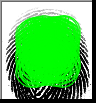

SIFT


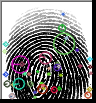

In [5]:
import cv2
from google.colab.patches import cv2_imshow

# Load the example image
example_image = cv2.imread("Altered-custom/1__M_Left_index_finger.BMP")

# Create SIFT and ORB feature detectors
sift = cv2.SIFT_create()
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors using SIFT
keypoints_sift, _ = sift.detectAndCompute(example_image, None)

# Detect keypoints and compute descriptors using ORB
keypoints_orb, _ = orb.detectAndCompute(example_image, None)

# Draw keypoints on the target image
example_image_sift = cv2.drawKeypoints(example_image, keypoints_sift, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
example_image_orb = cv2.drawKeypoints(example_image, keypoints_orb, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the images with keypoints
print("ORB")
cv2_imshow(example_image_orb)
print("SIFT")
cv2_imshow(example_image_sift)


### Image preprocessing
In the match finding not only two feature extractors will be tested but also three different preprocessing methods:

#### Gaussian Filter
Gaussian filtering involves convolving each point in the input array with a Gaussian kernel and summing them to produce the output array. This process effectively reduces noise and blurs the image.


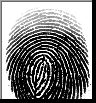

Gaussian blur


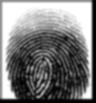

In [6]:
gauss_image = image = cv2.GaussianBlur(example_image, (5, 5), 0)
cv2_imshow(example_image)
print("Gaussian blur")
cv2_imshow(gauss_image)


#### Median Filter
The median filter iterates through each element of the signal, such as an image, and replaces each pixel with the median value of its neighboring pixels. The neighborhood is typically defined by a square around the evaluated pixel. This filter is effective in removing noise while preserving edges in the image.

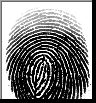

Median blur


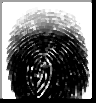

In [7]:
median_image = cv2.medianBlur(example_image, 3)
cv2_imshow(example_image)
print("Median blur")
cv2_imshow(median_image)


#### Bilateral Filter
The bilateral filter addresses the issue of traditional filters smoothing away edges along with noise. Similar to the Gaussian filter, it considers neighboring pixels with weighted contributions. However, the bilateral filter incorporates an additional component based on the difference in intensity between the neighboring pixels and the evaluated pixel. This ensures that edges are preserved while reducing noise in the image.


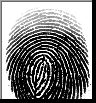

Bilateral filter


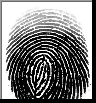

In [8]:
bilateral_image = cv2.bilateralFilter(example_image, 3, 75, 75)
cv2_imshow(example_image)
print("Bilateral filter")
cv2_imshow(bilateral_image)

#### HDR
HDR capture is a technique that creates high dynamic range (HDR) images (or extended dynamic range images) by taking and combining multiple exposures of the same subject matter at different exposures. Combining multiple images in this way results in an image with a greater dynamic range than what would be possible by taking one single image. It can be acheived by using openCV `detailEnhance` function.

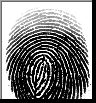

Detail Enhance


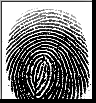

In [9]:
enhanced_image = cv2.detailEnhance(example_image)
cv2_imshow(example_image)
print("Detail Enhance")
cv2_imshow(enhanced_image)


### Match Finding using `FlannBasedMatcher`
Flann stands for **Fast Library for Approximate Nearest Neighbors**. It can be used to match or search for the features of one image to another image. It is available in the *OpenCV library*.  It uses *Nearest Neighbors* approach.

## Methods Comparison

Below code compares ORB and SIFT extraction methods combined with different preprocessing methods.

Processing time and match significance will be evaluated accross various methods.

In [2]:
!mkdir Real_subset && cp drive/MyDrive/Real_subset/* Real_subset/

In [3]:
!mkdir Altered-custom && cp drive/MyDrive/Altered-custom/* Altered-custom/

In [11]:
import cv2
import os
import numpy as np
import time
import pandas as pd

# Define the preprocessing functions to be used
preprocess_functions = ['none', 'gauss', 'median', 'bilateral_filter', 'hdr']

# Function to preprocess the image
def preprocess(image, processing_function='none'):
    if processing_function == 'gauss':
        # Gaussian blur for noise reduction
        image = cv2.GaussianBlur(image, (5, 5), 0)
    elif processing_function == 'median':
        # Median blur for noise reduction
        image = cv2.medianBlur(image, 3)
    elif processing_function == 'bilateral_filter':
        # Bilateral filter for noise reduction
        image = cv2.bilateralFilter(image, 15, 30, 7)
    elif processing_function == 'hdr':
        # Apply high dynamic range (HDR) effect
        image = cv2.detailEnhance(image)
    return image

# Function to extract features from an image
def features_extraction(image, extractor):
    try:
        keypoints, descriptors = extractor.detectAndCompute(image, None)
    except cv2.error as e:
        print(e)
        return None, None
    return keypoints, descriptors

# Directory containing fingerprint image database
dataDir = "Real_subset"
fingerprint_images_database = [os.path.join(dataDir, fingerprint_img) for fingerprint_img in os.listdir(dataDir)]

# Choosing one example image for fingerprint matching
target_image = cv2.imread("Altered-custom/1__M_Left_index_finger.BMP")

# Defining feature extractors
extractors = {
    "SIFT": cv2.SIFT_create(),
    "ORB": cv2.ORB_create(nfeatures=500)
}

# Directory to save matched images
output_dir = "Matched_Images"
os.makedirs(output_dir, exist_ok=True)

# Remove all files from the output directory
for filename in os.listdir(output_dir):
    file_path = os.path.join(output_dir, filename)
    if os.path.isfile(file_path):
        os.remove(file_path)

# List to store the results
results = []

# Scanning through each file in the database to find a match to the target
for preprocess_func in preprocess_functions:
    print(f"============Preprocessing: {preprocess_func.capitalize()}=============")

    # Preprocess the target image
    target_image_preprocessed = preprocess(target_image, preprocess_func)

    for extractor_name, extractor in extractors.items():
        print(f"--------Extractor: {extractor_name}--------")

        # Variables to track the best result
        best_result_significance = 0.0
        result_file_path = None
        result = None

        # Extract keypoints and descriptors from the target image
        keypoints_target, descriptors_target = features_extraction(target_image_preprocessed, extractor)

        start_time = time.time()

        for fingerprint_file in fingerprint_images_database:
            if not cv2.haveImageReader(fingerprint_file):
                continue

            # Preprocess the current fingerprint image
            curr_fingerprint_image = cv2.imread(fingerprint_file)
            curr_fingerprint_image_preprocessed = preprocess(curr_fingerprint_image, preprocess_func)

            # Extract keypoints and descriptors from the current fingerprint image
            keypoints_curr, descriptors_curr = features_extraction(curr_fingerprint_image_preprocessed, extractor)

            if descriptors_curr is None or descriptors_target is None:
                continue

            match_points = []

            if extractor_name == "SIFT":
                try:
                    # Match keypoints using SIFT
                    matches = cv2.FlannBasedMatcher(
                        dict(algorithm=1, trees=10), dict()).knnMatch(
                            np.float32(descriptors_target), np.float32(descriptors_curr), k=2)
                    for best_match, second_best_match in matches:
                        if best_match.distance < 0.1 * second_best_match.distance:
                            match_points.append(best_match)
                except cv2.error as e:
                    print(e)

            elif extractor_name == "ORB":
                try:
                    # Match keypoints using ORB
                    index_params = dict(algorithm=6, table_number=6, key_size=12, multi_probe_level=2)
                    search_params = {}
                    flann = cv2.FlannBasedMatcher(index_params, search_params)
                    matches = flann.knnMatch(descriptors_target, descriptors_curr, k=2)

                    # Apply Lowe's ratio test to filter good matches
                    good_matches = []
                    for m in matches:
                        if len(m) != 2:
                            continue
                        if m[0].distance < 0.75 * m[1].distance:
                            good_matches.append(m[0])
                    match_points = good_matches
                except cv2.error as e:
                    print(e)

            keypoints = min(len(keypoints_target), len(keypoints_curr))

            if keypoints > 0 and len(match_points) > 0:
                significance = len(match_points) / keypoints

                # Update best result if current result is better
                if significance > best_result_significance:
                    best_result_significance = significance
                    print(f"Better match found. {significance}%")
                    result_file_path = os.path.join(output_dir, f"{preprocess_func}_{extractor_name}_{os.path.basename(fingerprint_file)}")
                    result = cv2.drawMatches(target_image, keypoints_target, curr_fingerprint_image, keypoints_curr, match_points, None)

        end_time = time.time()
        execution_time = end_time - start_time

        # Append the results to the list
        results.append({
            'Preprocessing': preprocess_func,
            'Extractor': extractor_name,
            'Best Significance': best_result_significance,
            'Execution Time (s)': execution_time
        })

        # Save the result if it exists
        if result_file_path is not None and result is not None:
            cv2.imwrite(result_file_path, result)
        else:
            print("No matches found.")



============Preprocessing: None=============
--------Extractor: SIFT--------
Better match found. 1.0%
--------Extractor: ORB--------
Better match found. 0.023809523809523808%
Better match found. 0.03%
Better match found. 0.03389830508474576%
Better match found. 0.03669724770642202%
Better match found. 0.0410958904109589%
Better match found. 0.047058823529411764%
Better match found. 1.0%
============Preprocessing: Gauss=============
--------Extractor: SIFT--------
Better match found. 0.046511627906976744%
Better match found. 0.04878048780487805%
Better match found. 0.07142857142857142%
Better match found. 0.08%
Better match found. 1.0%
--------Extractor: ORB--------
Better match found. 0.14285714285714285%
Better match found. 0.16666666666666666%
Better match found. 0.20833333333333334%
Better match found. 1.2%
============Preprocessing: Median=============
--------Extractor: SIFT--------
Better match found. 0.07547169811320754%
Better match found. 0.23529411764705882%
Better match foun

### Results


      Preprocessing Extractor  Best Significance  Execution Time (s)
0              none      SIFT                1.0            4.485641
1              none       ORB                1.0            1.512388
2             gauss      SIFT                1.0            5.124473
3             gauss       ORB                1.2            0.862745
4            median      SIFT                1.0            4.292041
5            median       ORB                1.0            1.517357
6  bilateral_filter      SIFT                1.0            6.976191
7  bilateral_filter       ORB                1.0            4.019536
8               hdr      SIFT                1.0            5.971619
9               hdr       ORB                1.0            2.278186


gauss_ORB_16__M_Right_little_finger.BMP


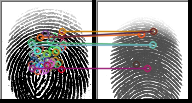



hdr_ORB_1__M_Left_index_finger.BMP


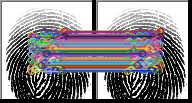



bilateral_filter_SIFT_1__M_Left_index_finger.BMP


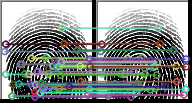



hdr_SIFT_1__M_Left_index_finger.BMP


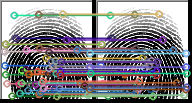



none_SIFT_1__M_Left_index_finger.BMP


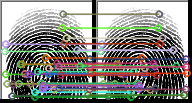



none_ORB_1__M_Left_index_finger.BMP


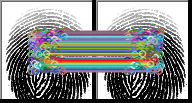



bilateral_filter_ORB_1__M_Left_index_finger.BMP


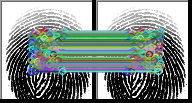



median_ORB_1__M_Left_index_finger.BMP


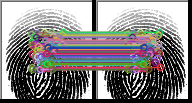



median_SIFT_1__M_Left_index_finger.BMP


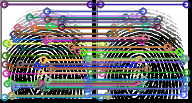



gauss_SIFT_1__M_Left_index_finger.BMP


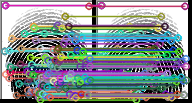

In [13]:
# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Display the DataFrame
print(df_results)

# Display saved matched images at the end
for result_image in os.listdir(output_dir):
    img = cv2.imread(os.path.join(output_dir, result_image))
    print(f"\n\n{result_image}")
    cv2_imshow(img)

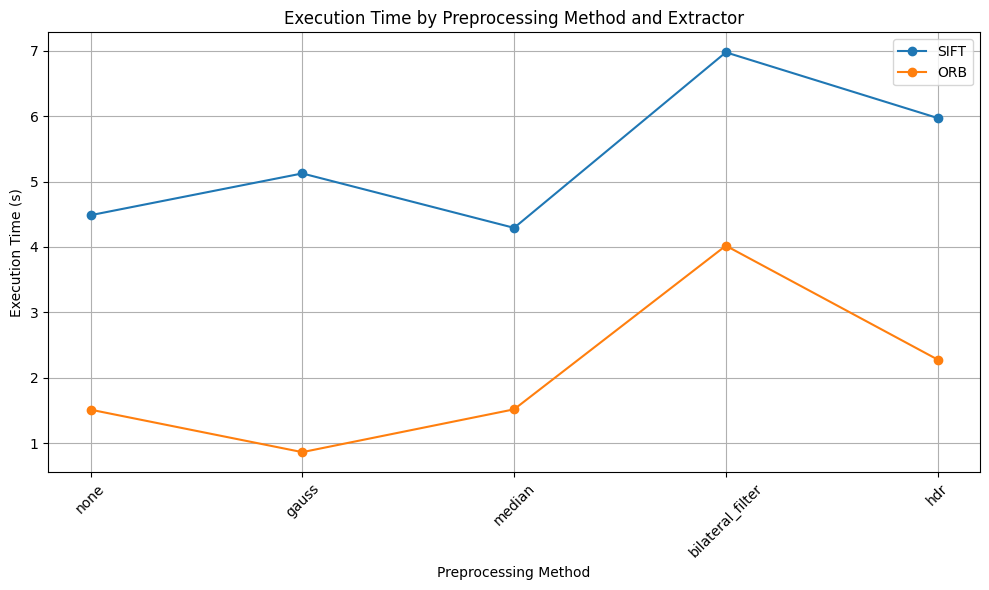

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'Preprocessing': ['none', 'none', 'gauss', 'gauss', 'median', 'median', 'bilateral_filter', 'bilateral_filter', 'hdr', 'hdr'],
    'Extractor': ['SIFT', 'ORB', 'SIFT', 'ORB', 'SIFT', 'ORB', 'SIFT', 'ORB', 'SIFT', 'ORB'],
    'Best Significance': [1.0, 1.0, 1.0, 1.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    'Execution Time (s)': [4.485641, 1.512388, 5.124473, 0.862745, 4.292041, 1.517357, 6.976191, 4.019536, 5.971619, 2.278186]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Plotting execution times
plt.figure(figsize=(10, 6))

# Plot for SIFT
sift_data = df[df['Extractor'] == 'SIFT']
plt.plot(sift_data['Preprocessing'], sift_data['Execution Time (s)'], marker='o', label='SIFT')

# Plot for ORB
orb_data = df[df['Extractor'] == 'ORB']
plt.plot(orb_data['Preprocessing'], orb_data['Execution Time (s)'], marker='o', label='ORB')

# Adding labels and title
plt.xlabel('Preprocessing Method')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time by Preprocessing Method and Extractor')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


## Testing best performing methods on altered target dataB

Based on execution times and visual matching points evaluation best performing methods are: **ORB + Detail Enhancement**


Alterations of target fingerprints include: glow, clipping, rotation, noise sharpening and blurring.

In [30]:
import cv2
import os
import numpy as np
import time


# Function to preprocess the image
def preprocess(image):
    image = cv2.detailEnhance(image)
    return image

# Function to extract features from an image
def features_extraction(image, extractor):
    try:
        keypoints, descriptors = extractor.detectAndCompute(image, None)
    except cv2.error as e:
        print(e)
        return None, None
    return keypoints, descriptors

# Directory containing fingerprint image database
dataDir = "Real_subset"
targetDir = "Altered-custom"
fingerprint_images_database = [os.path.join(dataDir, fingerprint_img) for fingerprint_img in os.listdir(dataDir)]
altered_target_images = [os.path.join(targetDir, fingerprint_img) for fingerprint_img in os.listdir(targetDir)]

# Defining feature extractor
extractor = cv2.ORB_create(nfeatures=500)


# Directory to save matched images
output_dir = "Matched_Images"

# Remove all files from the output directory
for filename in os.listdir(output_dir):
    file_path = os.path.join(output_dir, filename)
    if os.path.isfile(file_path):
        os.remove(file_path)
os.makedirs(output_dir, exist_ok=True)

# Scanning through each file in the database to find a match to the target
for target_file in altered_target_images:
    print("\n\nTarget file: ", target_file)
    target_image = cv2.imread(target_file)
    if target_image is None:
        print(f"Error reading target image: {target_file}")
        continue

    # Preprocess the target image
    target_image_preprocessed = preprocess(target_image)

    # Variables to track the best result
    best_result_significance = 0.0
    result_file_path = None
    result = None

    # Extract keypoints and descriptors from the target image
    keypoints_target, descriptors_target = features_extraction(target_image_preprocessed, extractor)
    if descriptors_target is None:
        print(f"No descriptors found for target image: {target_file}")
        continue

    for fingerprint_file in fingerprint_images_database:
        if not cv2.haveImageReader(fingerprint_file):
            print(f"Cannot read fingerprint file: {fingerprint_file}")
            continue

        # Preprocess the current fingerprint image
        curr_fingerprint_image = cv2.imread(fingerprint_file)
        if curr_fingerprint_image is None:
            print(f"Error reading fingerprint image: {fingerprint_file}")
            continue

        curr_fingerprint_image_preprocessed = preprocess(curr_fingerprint_image)

        # Extract keypoints and descriptors from the current fingerprint image
        keypoints_curr, descriptors_curr = features_extraction(curr_fingerprint_image_preprocessed, extractor)
        if descriptors_curr is None:
            print(f"No descriptors found for fingerprint image: {fingerprint_file}")
            continue

        match_points = []

        try:
            # Match keypoints using ORB
            index_params = dict(algorithm=6, table_number=6, key_size=12, multi_probe_level=2)
            search_params = {}
            flann = cv2.FlannBasedMatcher(index_params, search_params)
            matches = flann.knnMatch(descriptors_target, descriptors_curr, k=2)

            # Apply Lowe's ratio test to filter good matches
            good_matches = []
            for m in matches:
                if len(m) != 2:
                    continue
                if m[0].distance < 0.75 * m[1].distance:
                    good_matches.append(m[0])
            match_points = good_matches
        except cv2.error as e:
            print(e)

        keypoints = min(len(keypoints_target), len(keypoints_curr))

        if keypoints > 0 and len(match_points) > 0:
            significance = len(match_points) / keypoints

            # Update best result if current result is better
            if significance > best_result_significance:
                best_result_significance = significance
                print(f"Better match found. {significance}%")
                result_file_path = os.path.join(output_dir, f"{os.path.basename(target_file)}_{os.path.basename(fingerprint_file)}")
                result = cv2.drawMatches(target_image, keypoints_target, curr_fingerprint_image, keypoints_curr, match_points, None)

    # Save the result if it exists
    if result_file_path is not None and result is not None:
        cv2.imwrite(result_file_path, result)
        print(f"Saved result to: {result_file_path}")
    else:
        print("No matches found.")




Target file:  Altered-custom/1__M_Left_index_finger_przyciecie.BMP
Better match found. 0.009708737864077669%
Better match found. 0.01%
Better match found. 0.01834862385321101%
Better match found. 0.027522935779816515%
Better match found. 0.04819277108433735%
Better match found. 0.056338028169014086%
Better match found. 0.06818181818181818%
Better match found. 0.5596330275229358%
Saved result to: Matched_Images/1__M_Left_index_finger_przyciecie.BMP_1__M_Left_index_finger.BMP


Target file:  Altered-custom/1__M_Left_index_finger_rot.BMP
Better match found. 0.009708737864077669%
Better match found. 0.02912621359223301%
Better match found. 0.029411764705882353%
Better match found. 0.0375%
Better match found. 0.060240963855421686%
Better match found. 0.078125%
Better match found. 0.09523809523809523%
Better match found. 0.10204081632653061%
Better match found. 0.16666666666666666%
Better match found. 0.27586206896551724%
Saved result to: Matched_Images/1__M_Left_index_finger_rot.BMP_1__M_



1__M_Left_index_finger_rot_czesc.BMP_1__M_Left_index_finger.BMP


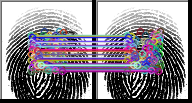



1__M_Left_index_finger_zamazanie.BMP_1__M_Left_index_finger.BMP


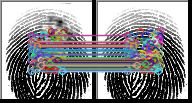



1__M_Left_index_finger_poswiata.BMP_1__M_Left_index_finger.BMP


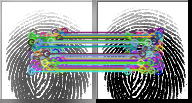



1__M_Left_index_finger_przyciecie.BMP_1__M_Left_index_finger.BMP


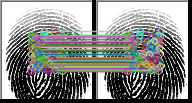



1__M_Left_index_finger_rot.BMP_1__M_Left_index_finger.BMP


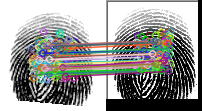



1__M_Left_index_finger.BMP_1__M_Left_index_finger.BMP


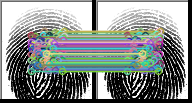



1__M_Left_index_finger_szum.BMP_1__M_Left_index_finger.BMP


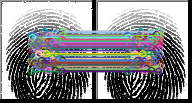



1__M_Left_index_finger_wyostrz.BMP_1__M_Left_index_finger.BMP


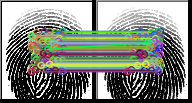

In [31]:
# Display saved matched images at the end
for result_image in os.listdir("Matched_Images"):
    img = cv2.imread(os.path.join(output_dir, result_image))
    print(f"\n\n{result_image}")
    cv2_imshow(img)

## Results

For all types of transformation the correct match was found.

With the lowest confidence for partial rotation and full rotation `~30%` and highest for sharpened (hyperresolution) image `~76%`.

## Summary

The primary goal of these efforts was to develop and evaluate a method for fingerprint matching using various preprocessing techniques and feature extraction methods. The process involved enhancing the clarity of fingerprint images, extracting distinctive features, and comparing them to identify matches effectively. The matching process successfully identified significant matches between target and database fingerprint images.

Best performing methods for this task turned out to be ORB keypoints extractor combined with detail enhancement as preprocessing method. This combination ensured resilience to data alterations.